In [5]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For outliers detection
from sklearn import preprocessing, svm
## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [8]:
data = pd.read_csv("restaurant-1-orders.csv")
data.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [10]:
#slect only needed columns
data_port = data[["Order Date", "Product Price", "Quantity", "Total products"]]

# drop NaN-Cases
data_port = data_port.dropna()
data_port


,Order Date,Product Price,Quantity,Total products
0,03/08/2019 20:25,0.80,2,6
1,03/08/2019 20:25,12.95,1,6
2,03/08/2019 20:25,2.95,1,6
3,03/08/2019 20:25,3.95,1,6
4,03/08/2019 20:25,8.95,1,6
...,...,...,...,...
74813,18/05/2016 18:53,17.95,2,7
74814,14/05/2016 19:28,17.95,2,6
74815,10/05/2016 13:18,17.95,2,9
74816,07/04/2016 19:04,17.95,1,6


In [13]:
#change to datetime
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"], format='%d.%m.%Y')
data_port = data_port.set_index('Order Date')

data_port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74818 entries, 2019-03-08 20:25:00 to 2015-02-10 17:29:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Price   74818 non-null  float64
 1   Quantity        74818 non-null  int64  
 2   Total products  74818 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [14]:
ts = data_port.groupby("Order Date")["Total products"]
ts.head()

Order Date
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
                      ..
2016-11-14 13:31:00    6
2016-09-20 19:02:00    5
2016-09-18 12:30:00    5
2016-09-15 18:45:00    5
2016-09-13 18:20:00    4
Name: Total products, Length: 56839, dtype: int64

In [15]:
ts.tail()

Order Date
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
2019-03-08 20:25:00    6
                      ..
2016-05-18 18:53:00    7
2016-05-14 19:28:00    6
2016-10-05 13:18:00    9
2016-07-04 19:04:00    6
2015-02-10 17:29:00    9
Name: Total products, Length: 56839, dtype: int64

Order Date
2015-01-09 14:42:00    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-10 09:54:00    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-10 10:02:00    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-10 10:49:00    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-10 15:19:00    AxesSubplot(0.125,0.2;0.775x0.68)
                                     ...                
2019-12-07 19:51:00    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-07 19:54:00    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-07 19:56:00    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-07 21:13:00    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-07 22:24:00    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Total products, Length: 13081, dtype: object

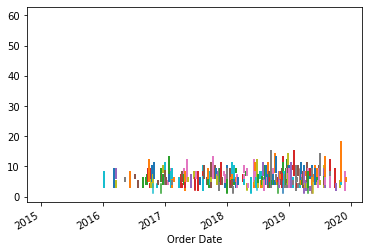

In [16]:
ts.plot()

## Quellen

https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205